## **Importing Libraries**

In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses


## **Downloading and exploring the StackOverflow dataset**

In [ ]:
# Downloading and exploring the StackOverflow dataset
import pathlib
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'
dataset = tf.keras.utils.get_file(
  'stack_overflow_16k.tar.gz',
  data_url,
  untar=True,  # extract form compress file
  cache_dir='stack_overflow', # so we dont need to download agian and again ( takai bar bar download na karan pare aur idhar para rahe)
  cache_subdir='.') # to save in root directory (yani upar wali direcotry ka root mai save ho)


dataset_dir = pathlib.Path(dataset).parent # Get the parent directory of the "dataset" path

## **Check what is inside the dataset directory**

In [ ]:
os.listdir(dataset_dir) #check karo esa

['stack_overflow_16k.tar.gz', 'test', 'README.md', 'train']

## **Go to Training Dataset**

In [ ]:
train_dir = os.path.join(dataset_dir, 'train') # es mai train ka data ka link add karo aur train ko use karo
os.listdir(train_dir)

['python', 'java', 'javascript', 'csharp']

## **Checking a sample file**

In [ ]:
sample_file = os.path.join(train_dir, 'python/1365.txt')
with open(sample_file) as f:
  print(f.read())

"using code to write a function that calculates values for projectile motion i have an assignment that asks me to use some given code to write a function which calculates the angle needed to hit a target 10 metres away. ..here is the given code: ..from visual import *.from visual.graph import * # for the graphing functions .#create a graph display window (gdisplay) ..win = gdisplay(xtitle=""distance [m]"", ytitle=""height [m]"") .#and a curve on this display ..poscurve = gcurve(gdisplay=win, color=color.cyan) .#target position (10 meters away) ..target_pos = vector(10,0,0) .#set the starting angle (in degrees) ..angle = 45 .#set the magnitude of the starting velocity (in m/s) ..v0 = 12.0 .#gravity vector (m/s**2) ..g = vector(0, -9.8, 0) .#create a vector for the projectile's velocity ..velocity = v0 * vector(cos(anglepi/180), sin(anglepi/180), 0) .#and the position ..position = vector(0,0,0) .dt = 0.01 # time step .#start loop. each time taking a small step in time ..while (position.y

## **Create a dataset with 80% of the data in the train_dir directory used for training 20% used for validation**

In [ ]:
# Create a dataset with 80% of the data in the train_dir directory used for training
# and 20% used for validation
batch_size = 32
seed = 42
raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
  train_dir,
  batch_size=batch_size,
  validation_split=0.2,
  subset='training',
  seed=seed)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


## **Validation Set**

In [ ]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
  train_dir,
  batch_size=batch_size,
  validation_split=0.2, 
  subset='validation',
  seed=seed)

Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


## **Checking Labels**

In [ ]:
for i, label in enumerate(raw_train_ds.class_names):
  print("Label", i, "corresponds to", label)

Label 0 corresponds to csharp
Label 1 corresponds to java
Label 2 corresponds to javascript
Label 3 corresponds to python


## **Perfroming NLP**

In [ ]:
VOCAB_SIZE = 10000
binary_vectorize_layer = tf.keras.layers.TextVectorization(
  max_tokens=VOCAB_SIZE,
  output_mode='binary') #to represent every number with two words # har word ko two number sai represent kai
MAX_SEQUENCE_LENGTH = 250

In [ ]:
int_vectorize_layer = tf.keras.layers.TextVectorization(
  max_tokens=VOCAB_SIZE,
  output_mode='int',
  output_sequence_length=MAX_SEQUENCE_LENGTH)

In [ ]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda text, labels: text)
binary_vectorize_layer.adapt(train_text)
int_vectorize_layer.adapt(train_text)

In [ ]:
def binary_vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return binary_vectorize_layer(text), label
def int_vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return int_vectorize_layer(text), label
binary_train_ds = raw_train_ds.map(binary_vectorize_text)
binary_val_ds = raw_val_ds.map(binary_vectorize_text)
binary_test_ds = raw_test_ds.map(binary_vectorize_text)
int_train_ds = raw_train_ds.map(int_vectorize_text)
int_val_ds = raw_val_ds.map(int_vectorize_text)
int_test_ds = raw_test_ds.map(int_vectorize_text)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
def configure_dataset(dataset):
  return dataset.cache().prefetch(buffer_size=AUTOTUNE)
binary_train_ds = configure_dataset(binary_train_ds)
binary_val_ds = configure_dataset(binary_val_ds)
binary_test_ds = configure_dataset(binary_test_ds)
int_train_ds = configure_dataset(int_train_ds)
int_val_ds = configure_dataset(int_val_ds)
int_test_ds = configure_dataset(int_test_ds)

In [ ]:
binary_model = tf.keras.Sequential([layers.Dense(4)])
binary_model.compile(
  loss=losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'])
history = binary_model.fit( 
  binary_train_ds, validation_data=binary_val_ds, epochs=10)

Epoch 1/10
200/200 [==============================] - 4s 20ms/step - loss: 1.1172 - accuracy: 0.6448 - val_loss: 0.9122 - val_accuracy: 0.7769
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.7781 - accuracy: 0.8198 - val_loss: 0.7488 - val_accuracy: 0.7956
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.6270 - accuracy: 0.8625 - val_loss: 0.6634 - val_accuracy: 0.8131
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.5336 - accuracy: 0.8866 - val_loss: 0.6101 - val_accuracy: 0.8238
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4677 - accuracy: 0.9042 - val_loss: 0.5735 - val_accuracy: 0.8319
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4174 - accuracy: 0.9152 - val_loss: 0.5469 - val_accuracy: 0.8356
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3772 - accuracy: 0.9273 - val_loss: 0.5268 - val_accuracy: 0.8369
Epoch

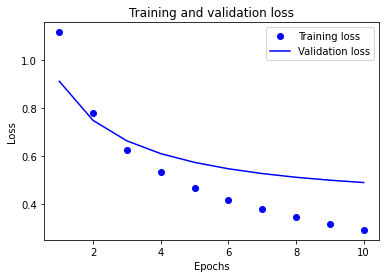

In [ ]:
# Creating a plot of accuracy and loss over time
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

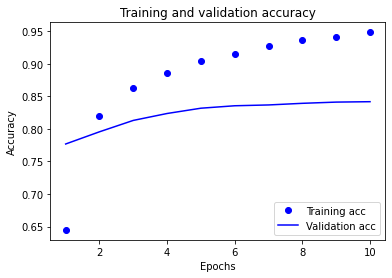

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
def create_model(vocab_size, num_labels):
  model = tf.keras.Sequential([
    layers.Embedding(vocab_size, 64, mask_zero=True),
    layers.Conv1D(64, 5, padding="valid", activation="relu", strides=2),
    layers.GlobalMaxPooling1D(),
    layers.Dense(num_labels)
    ])
  return model
# vocab_size is VOCAB_SIZE + 1 since 0 is used additionally for padding.
int_model = create_model(vocab_size=VOCAB_SIZE + 1, num_labels=4)
int_model.compile(
  loss=losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'])
history = int_model.fit(int_train_ds, validation_data=int_val_ds, epochs=5)

Epoch 1/5
200/200 [==============================] - 9s 42ms/step - loss: 1.1492 - accuracy: 0.5111 - val_loss: 0.7677 - val_accuracy: 0.6969
Epoch 2/5
200/200 [==============================] - 6s 31ms/step - loss: 0.6253 - accuracy: 0.7548 - val_loss: 0.5612 - val_accuracy: 0.7894
Epoch 3/5
200/200 [==============================] - 7s 35ms/step - loss: 0.3831 - accuracy: 0.8792 - val_loss: 0.4927 - val_accuracy: 0.8231
Epoch 4/5
200/200 [==============================] - 9s 46ms/step - loss: 0.2150 - accuracy: 0.9477 - val_loss: 0.4874 - val_accuracy: 0.8163
Epoch 5/5
200/200 [==============================] - 6s 31ms/step - loss: 0.1097 - accuracy: 0.9816 - val_loss: 0.5086 - val_accuracy: 0.8125


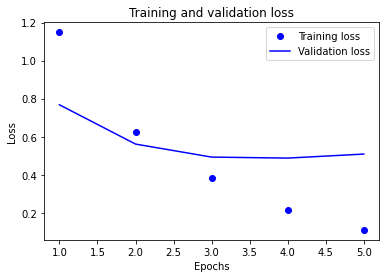

In [ ]:
# Creating a plot of accuracy and loss over time
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

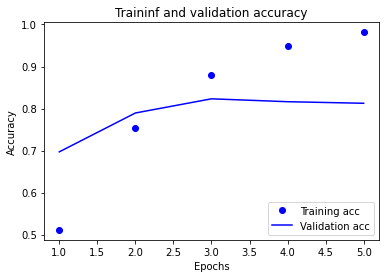

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traininf and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print("Linear model on binary vectorized data:")
print(binary_model.summary())

Linear model on binary vectorized data:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 40004     
                                                                 
Total params: 40,004
Trainable params: 40,004
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
print("ConvNet model on int vectorized data:")
print(int_model.summary())

ConvNet model on int vectorized data:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          640064    
                                                                 
 conv1d (Conv1D)             (None, None, 64)          20544     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 660,868
Trainable params: 660,868
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Evaluating the model
binary_loss, binary_accuracy = binary_model.evaluate(binary_test_ds)
int_loss, int_accuracy = int_model.evaluate(int_test_ds)
print("Binary model accuracy: {:2.2%}".format(binary_accuracy))
print("Int model accuracy: {:2.2%}".format(int_accuracy))

782/782 [==============================] - 12s 16ms/step - loss: 1.9880 - accuracy: 0.1770
Binary model accuracy: 21.30%
Int model accuracy: 17.70%


In [ ]:
# Inferencing on new data
def get_string_labels(predicted_scores_batch):
  predicted_int_labels = tf.argmax(predicted_scores_batch, axis=1)
  predicted_labels = tf.gather(raw_train_ds.class_names,
                               predicted_int_labels)
  return predicted_labels

inputs = [
       "how do I extract keys from a dict into a list?",  # python
       "debug public static void main(string[] args) {...}",  # java
       ]
predicted_scores = export_model.predict(inputs)
predicted_labels = get_string_labels(predicted_scores)
for input, label in zip(inputs, predicted_labels):
  print("Question: ", input)
  print("Predicted label: ", label.numpy())

1/1 [==============================] - 0s 109ms/step
Question:  how do I extract keys from a dict into a list?
Predicted label:  b'csharp'
Question:  debug public static void main(string[] args) {...}
Predicted label:  b'csharp'
